<a href="https://colab.research.google.com/github/romenlaw/NaiveNeuralNetwork/blob/main/tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Git

In [2]:
!git config --global user.name "romenlaw"
!git config --global user.email "e"
TOKEN='github_pat_'
!git clone https://$TOKEN@github.com/romenlaw/NaiveNeuralNetwork

Cloning into 'NaiveNeuralNetwork'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 96 (delta 42), reused 21 (delta 5), pack-reused 0
Receiving objects: 100% (96/96), 32.90 KiB | 1.93 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [ ]:
%cd /content/NaiveNeuralNetwork

/content/NaiveNeuralNetwork


In [ ]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [ ]:
!git add .
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   __pycache__/nnn.cpython-310.pyc
	modified:   nnn.py
	new file:   visualiser.py



In [ ]:
!git commit -m "add visualiser"

[main b35e37b] add visualiser
 3 files changed, 8 insertions(+), 5 deletions(-)
 create mode 100644 __pycache__/nnn.cpython-310.pyc
 create mode 100644 visualiser.py


In [ ]:
!git push origin main

Enumerating objects: 8, done.
Counting objects: 100% (8/8), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (6/6), 1.10 KiB | 1.10 MiB/s, done.
Total 6 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/romenlaw/NaiveNeuralNetwork
   fdb2d25..b35e37b  main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


# Housekeeping

In [1]:
!pwd

/content


In [1]:
import sys
sys.path.insert(0, '/content/NaiveNeuralNetwork')

%load_ext autoreload
%autoreload 2

In [2]:
from nnn import Scalar

In [3]:
a=Scalar(2., label='a')
b=Scalar(3, label='b')
c=a+b; c.label='c'

In [6]:
c

c: 5.0

In [81]:
with open('NaiveNeuralNetwork/nnn.py', 'r') as f:
  print(f.read())

class Scalar:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.label = label
    self._op = _op
    self._children = _children

  def __str__(self):
    return f"{self.label}={self.data}"

  def __repr__(self):
    return f"{self.label}:a {self.data}"

  def __add__(self, other):
    out = Scalar(self.data + other.data, (self, other), '+')
    return out
    
  def __mul__(self, other):
    out = Scalar(self.data * other.data, (self, other), '*')
    return out

  def __truediv__(self, other):
    out = Scalar(self.data / other.data, (self, other), '/')
    return out

  def __pow__(self, other):
    out = Scalar(self.data ** other.data, (self, other), 'pow')
    return out

  def backward(self):
    pass



# Visualise

In [ ]:
import graphviz

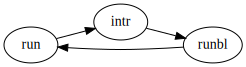

In [ ]:
g = graphviz.Digraph(format='svg', graph_attr={'rankdir': 'LR'})
g.edge('run', 'intr')
g.edge('intr', 'runbl')
g.edge('runbl', 'run')
g